<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/intro_ml_sklearn/intro_ml_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a classificação


In [0]:

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

X_train = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3] 
y_train = [1,1,1,0,0,0]

In [2]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [3]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [0]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]
X_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]
previsoes = model.predict(X_test)

In [5]:
corretos = (previsoes == y_test).sum()
total = len(y_test)
taxa_de_acerto = corretos/total
taxa_de_acerto

0.6666666666666666

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, previsoes)

0.6666666666666666

# Trabalhando com dados de acesso de usuarios num site

In [7]:
import pandas as pd

dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv')
dados = dados.rename(columns={
    'home': 'principal',
    'how_it_works': 'como_funciona',
    'contact': 'contato',
    'bought': 'comprou'
})
dados.head()

,principal,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [8]:
X = dados[['principal', 'como_funciona', 'contato']]
y = dados['comprou']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [9]:
dados.shape

(99, 4)

In [10]:
X_train = X[:75]
y_train = y[:75]
X_test = X[75:]
y_test = y[75:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 3), (24, 3), (75,), (24,))

In [11]:
modelo = LinearSVC()
modelo.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [12]:
previsoes = modelo.predict(X_test)
accuracy_score(y_test, previsoes)

0.9583333333333334

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((74, 3), (25, 3), (74,), (25,))

In [15]:
modelo = LinearSVC()
modelo.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [16]:
previsoes = modelo.predict(X_test)
accuracy_score(y_test, previsoes)

1.0

In [17]:
y_train.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [18]:
y_test.value_counts()

0    17
1     8
Name: comprou, dtype: int64

# Projeto pro site

In [19]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [20]:
dados.rename(columns={
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
    'unfinished': 'nao_finalizado'
}, inplace=True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [21]:
troca = {1:0, 0:1}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


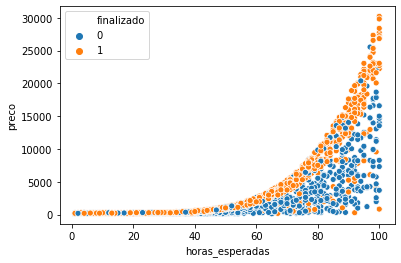

In [22]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

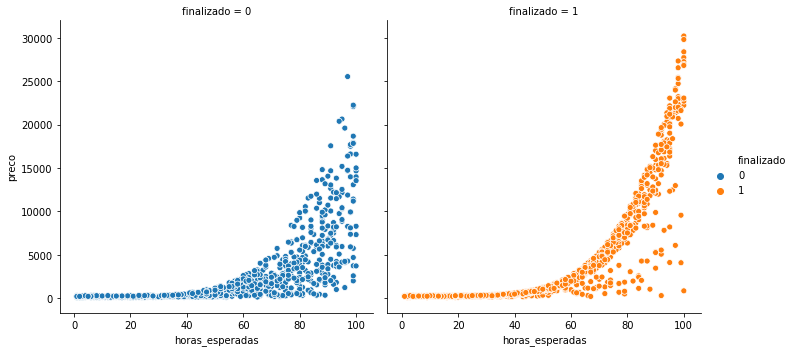

In [23]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", hue="finalizado", data=dados)

In [24]:
X = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=SEED, test_size=0.25, stratify=y)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1617, 2), (540, 2), (1617,), (540,))

In [25]:
modelo = LinearSVC().fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)
acuracia

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4740740740740741

In [26]:
import numpy as np

ones = np.ones(len(y_test))
accuracy_score(y_test, ones)

0.5259259259259259

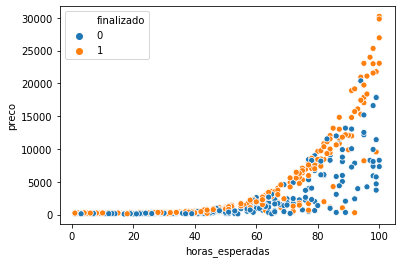

In [27]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=y_test, data=X_test)

In [28]:
x_min = X_test.horas_esperadas.min()
x_max = X_test.horas_esperadas.max()

y_min = X_test.preco.min()
y_max = X_test.preco.max()

print(x_min, x_max, y_min, y_max)



1 100 100 30223


In [29]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

#100x100
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

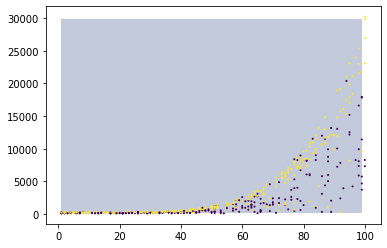

In [30]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test.horas_esperadas, X_test.preco, c=y_test, s=1)

# Estimadores não lineares e SVM

In [31]:
from sklearn.svm import SVC
SEED = 5
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

modelo = SVC().fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acc = accuracy_score(y_test, previsoes)
acc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5907407407407408

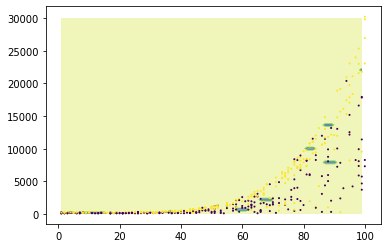

In [32]:
x_min = X_test.horas_esperadas.min()
x_max = X_test.horas_esperadas.max()

y_min = X_test.preco.min()
y_max = X_test.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

#100x100
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test.horas_esperadas, X_test.preco, c=y_test, s=1)



In [33]:
# O modelo é sensivel as escalas, vamos reescalar
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)

raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)

# Reescalar
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

modelo = SVC().fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acc = accuracy_score(y_test, previsoes)
acc

0.6685185185185185

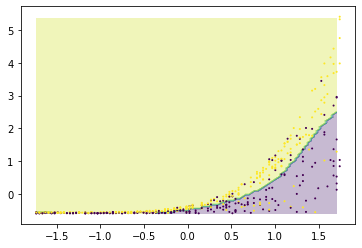

In [34]:
data_x = X_test[:, 0]
data_y = X_test[:, 1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

#100x100
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)



# Projeto venda de carros

In [49]:
SEED = 5
np.random.seed = SEED

dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [50]:
dados = dados.rename(columns={
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
})
dados['vendido'] = dados['vendido'].map({
    'no':0, 'yes':1
})
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [51]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


In [52]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,19,35085.22134
1,1,7843,1998,40557.96,1,21,12622.05362
2,2,7109,2006,89627.50,0,13,11440.79806
3,3,26823,2015,95276.14,0,4,43167.32682
4,4,7935,2014,117384.68,1,5,12770.11290


In [53]:
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,19,35085.22134
1,40557.96,1,21,12622.05362
2,89627.50,0,13,11440.79806
3,95276.14,0,4,43167.32682
4,117384.68,1,5,12770.11290


In [54]:
X = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

modelo = LinearSVC().fit(X_train, y_train)
previsoes = modelo.predict(X_test)

acc = accuracy_score(y_test, previsoes)
acc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.58

In [55]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
previsoes = dummy.predict(X_test)

acc = accuracy_score(y_test, previsoes)
acc


0.58

In [56]:
dummy.score(X_test, y_test)

0.58

In [57]:
raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)

# Reescalar
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

modelo = SVC().fit(X_train, y_train)
acc = modelo.score(X_test, y_test)
acc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7752

# Usando árvores de decisão

In [74]:
from sklearn.tree import DecisionTreeClassifier

SEED = 5
np.random.seed = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)

modelo = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
acc = modelo.score(X_test, y_test)
acc

0.7928

In [72]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


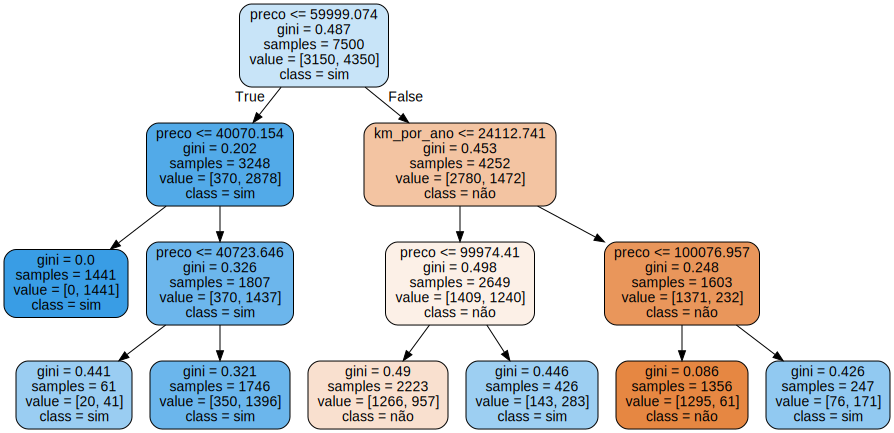

In [75]:
from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(modelo, filled=True, rounded=True,
                           class_names=['não', 'sim'], feature_names=features)
grafico = graphviz.Source(dot_data)
grafico